In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Understanding

In [2]:
data=pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.dtypes.value_counts()

,count
object,3
int64,2
float64,2


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.shape

(1338, 7)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
#checking null values
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Data Exploration

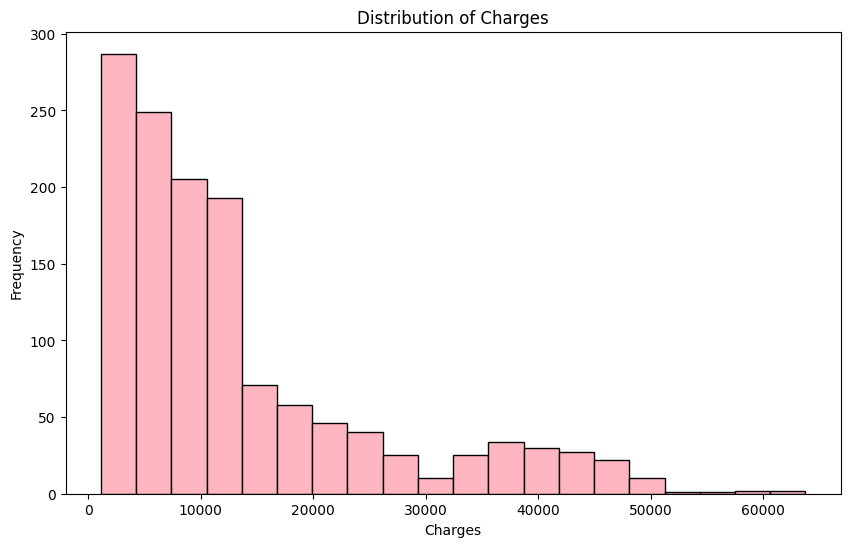

In [10]:
plt.figure(figsize = (10, 6))
plt.hist(data['charges'], bins = 20, color = 'lightpink', edgecolor = 'black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

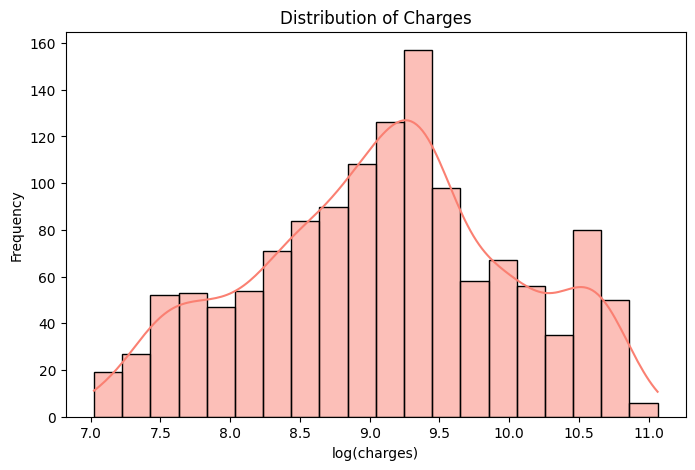

In [11]:
# log transform Charges for better visualization

plt.figure(figsize = (8,5))
sns.histplot(data=data, x = np.log1p(data['charges']), kde=True, color='salmon', bins = 20)
plt.title('Distribution of Charges')
plt.xlabel('log(charges)')
plt.ylabel('Frequency')
plt.show()

## Univariant Analysis

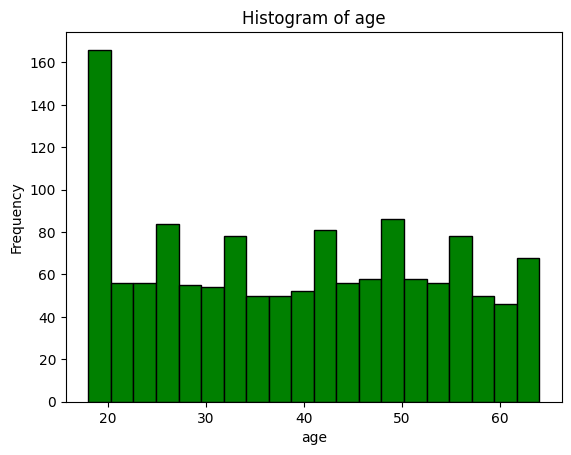

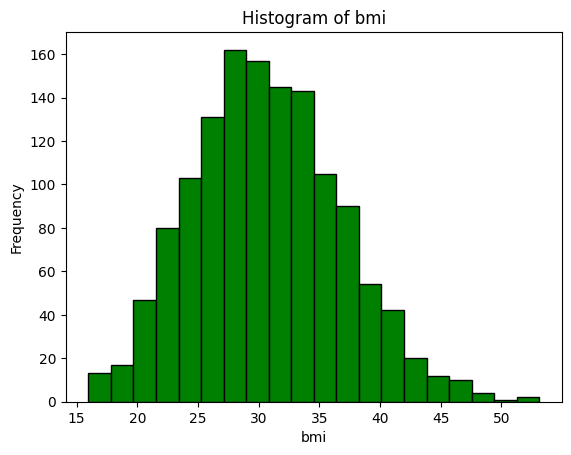

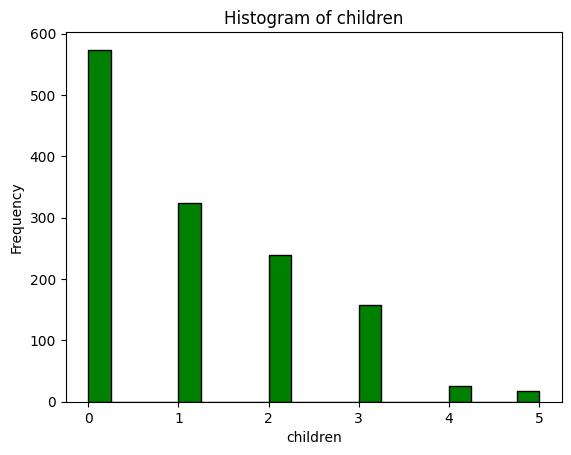

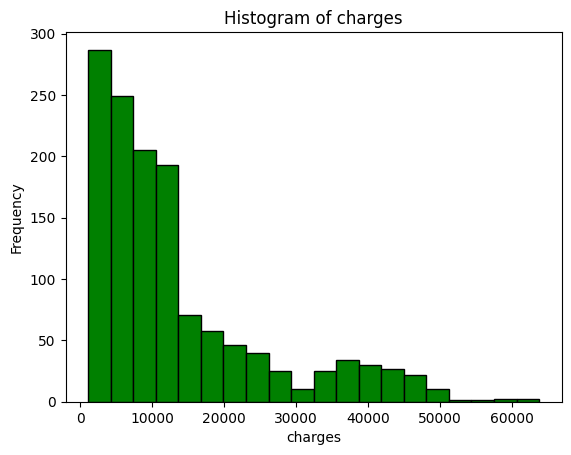

In [12]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
  plt.hist(data[col], bins=20, edgecolor='black',color='green')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

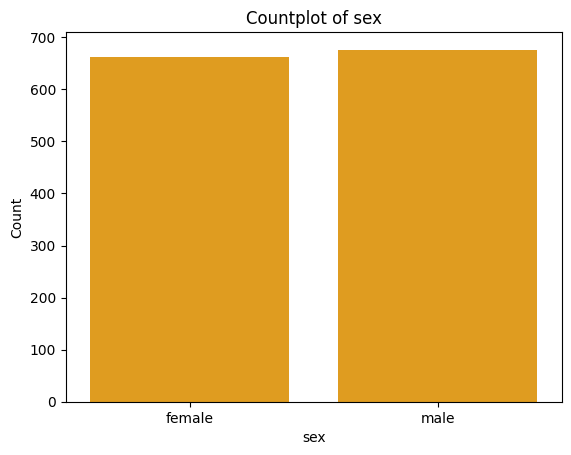

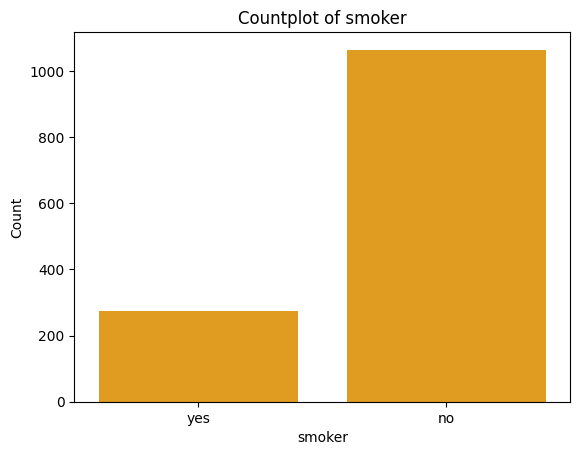

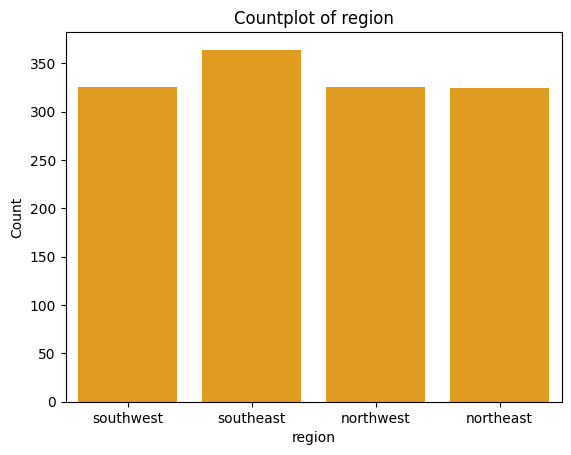

In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
  sns.countplot(x=col, data=data,color="orange")
  plt.title(f'Countplot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

## Bivariant Analysis

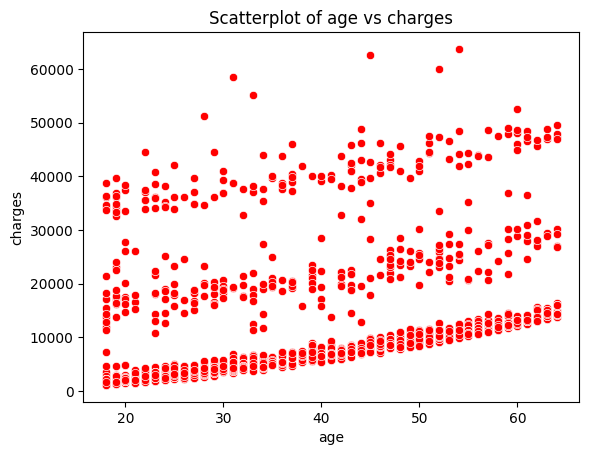

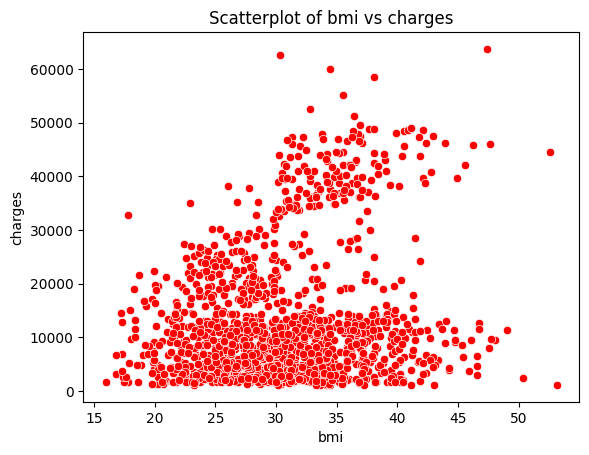

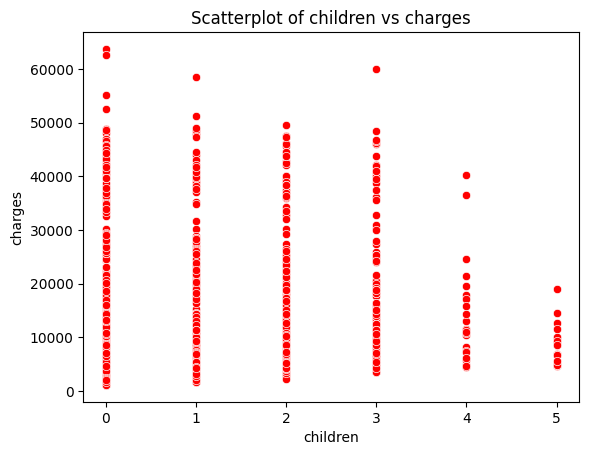

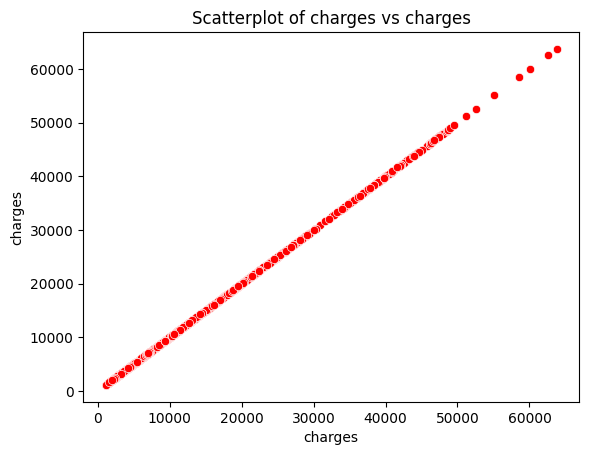

In [14]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    sns.scatterplot(x=data[col], y=data['charges'],color='red')
    plt.title(f'Scatterplot of {col} vs charges')
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.show()


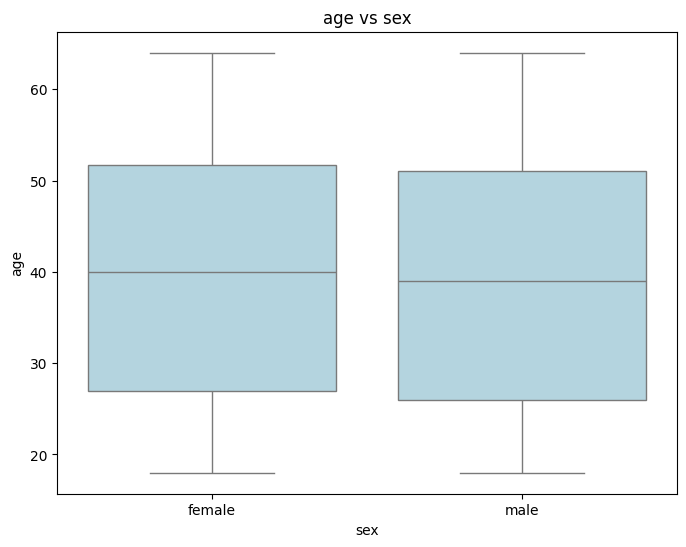

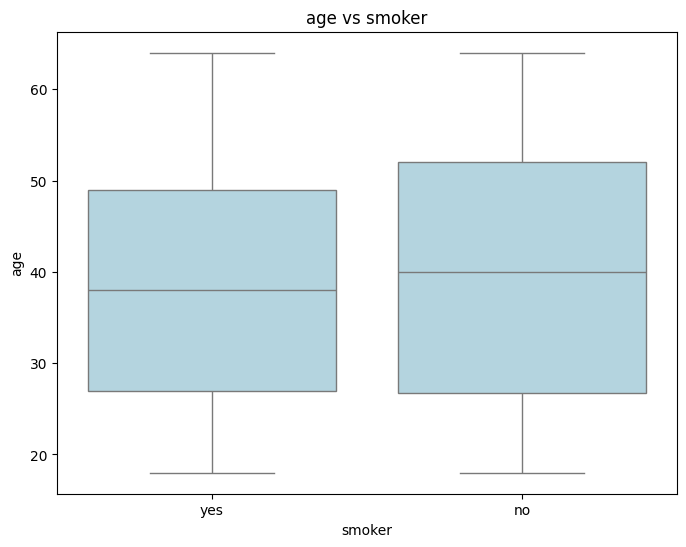

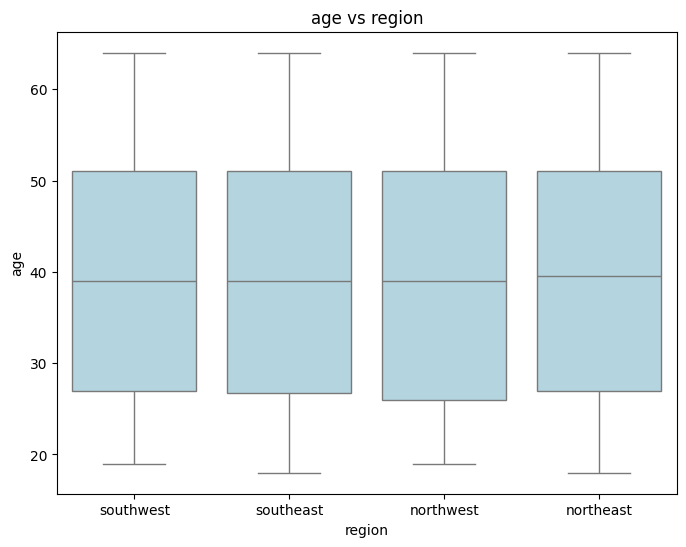

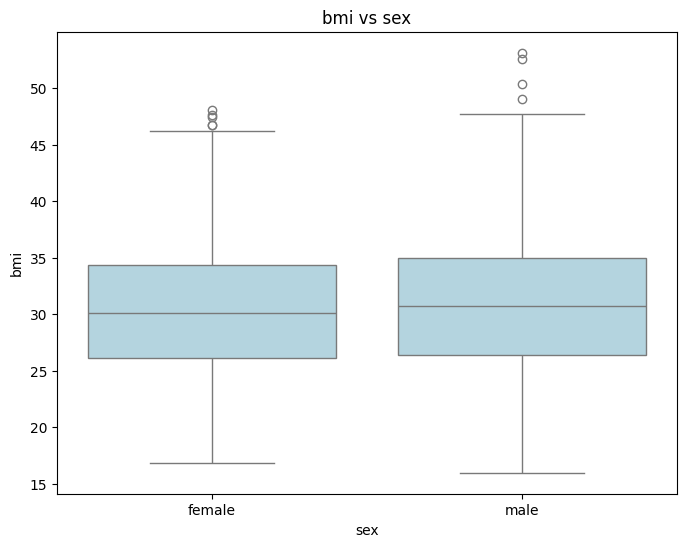

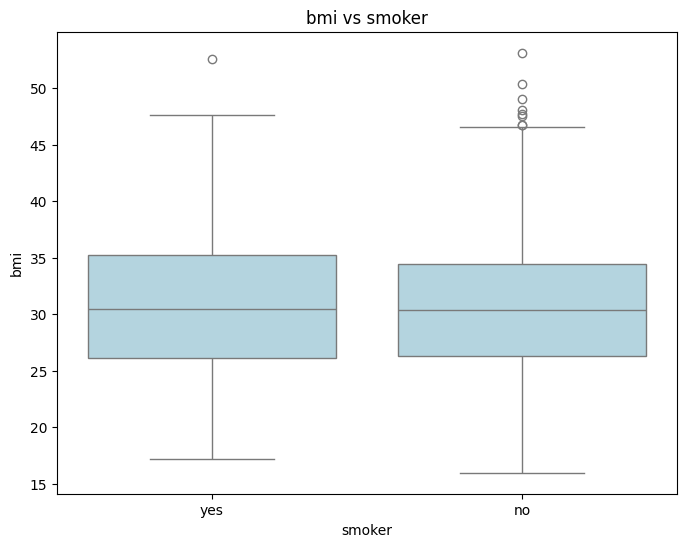

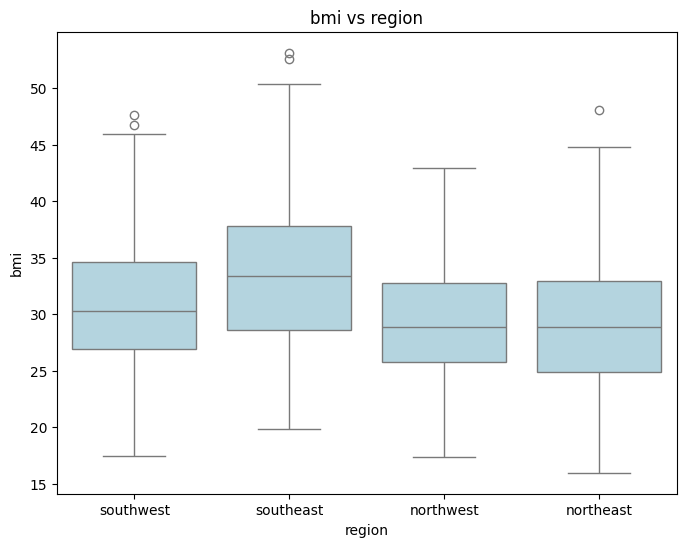

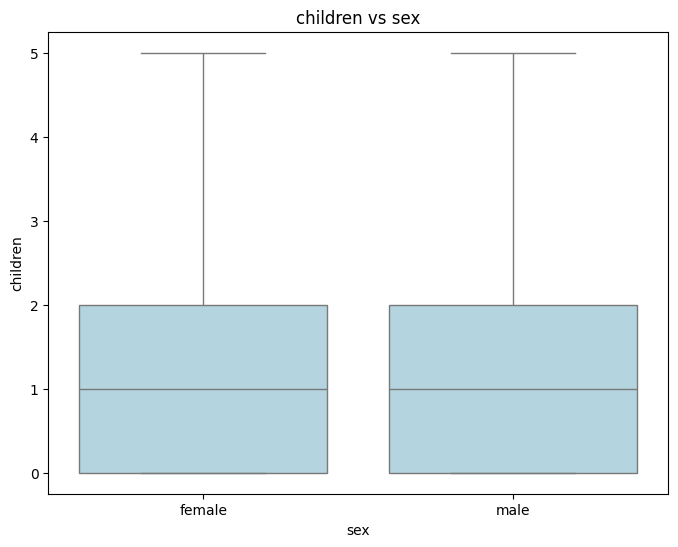

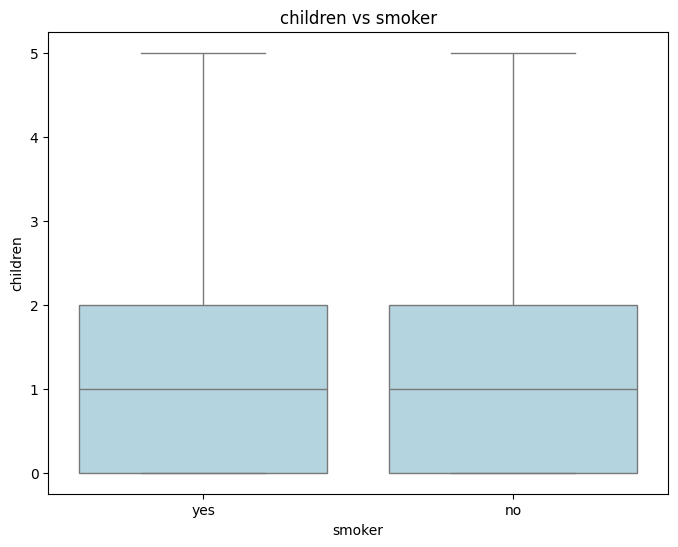

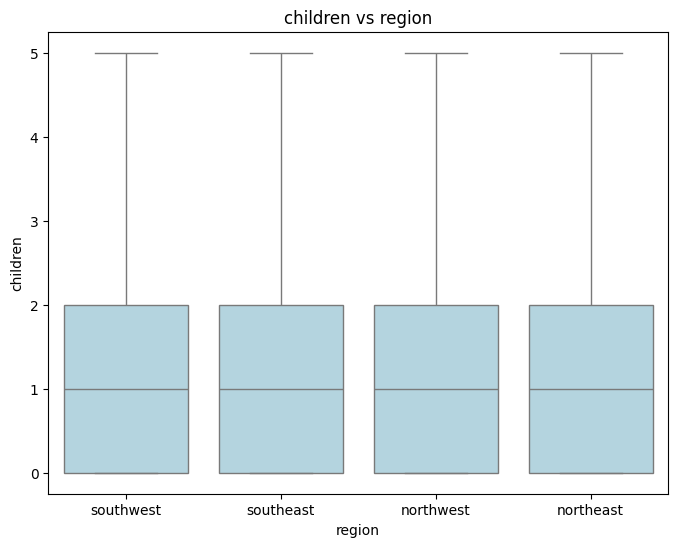

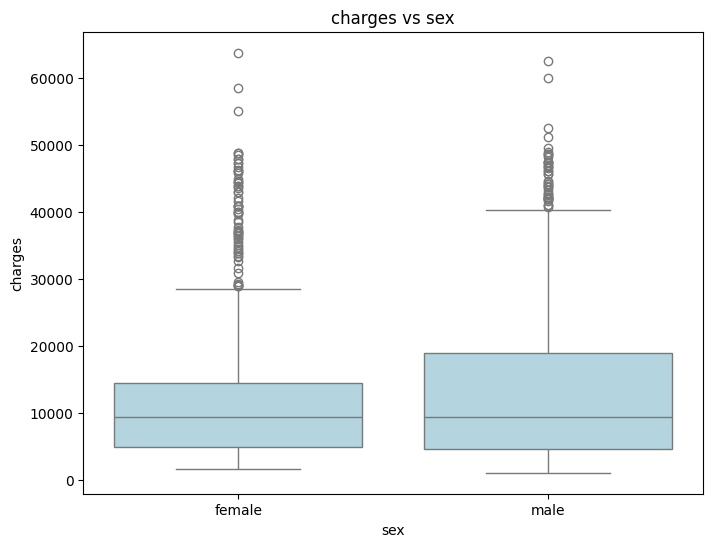

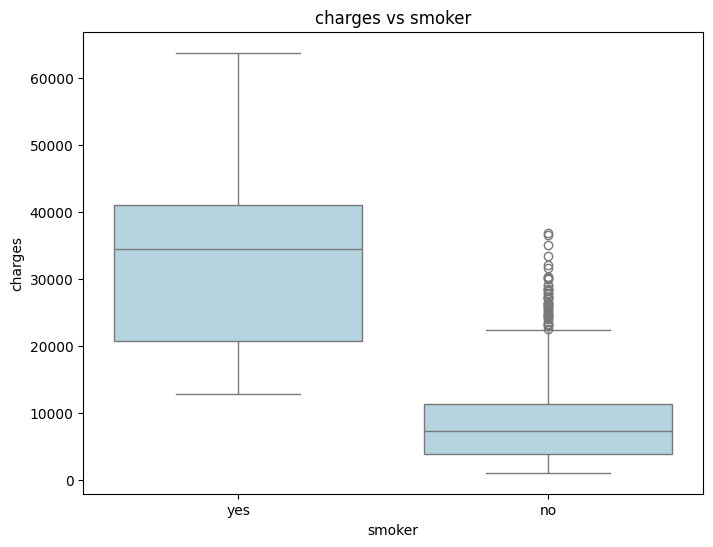

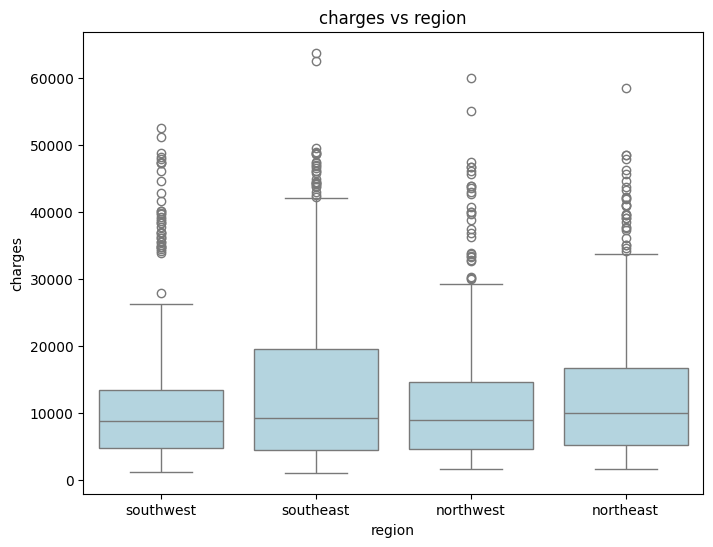

In [15]:
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[cat_col], y=data[num_col],color='lightblue')
        plt.title(f'{num_col} vs {cat_col}')
        plt.show()


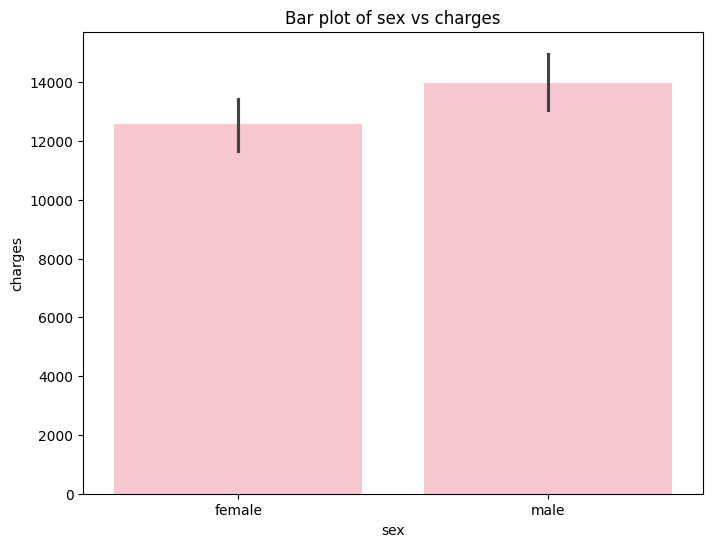

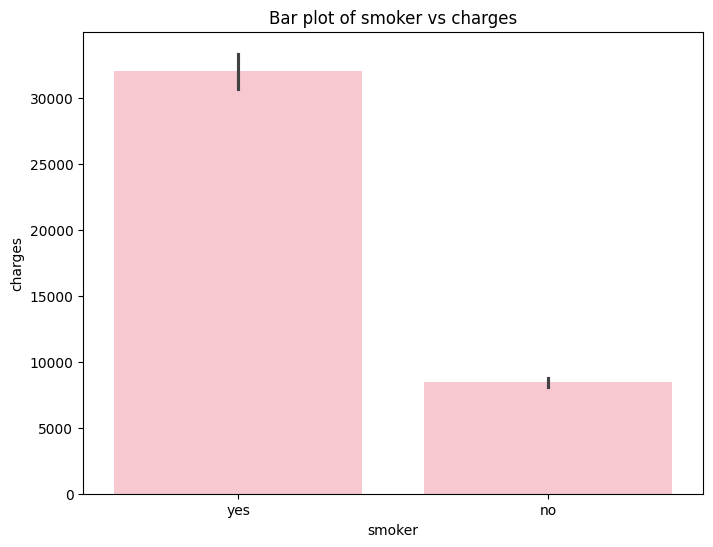

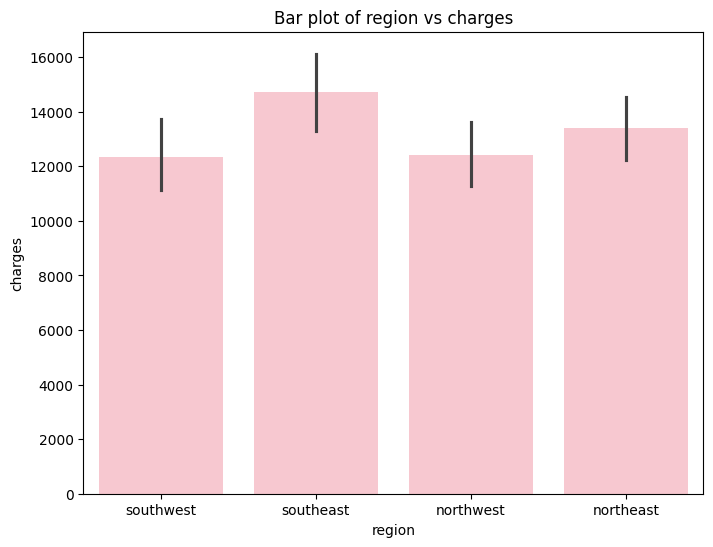

In [16]:
for cat_col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data[cat_col], y=data['charges'],color='pink')
    plt.title(f'Bar plot of {cat_col} vs charges')
    plt.show()

##Correlation

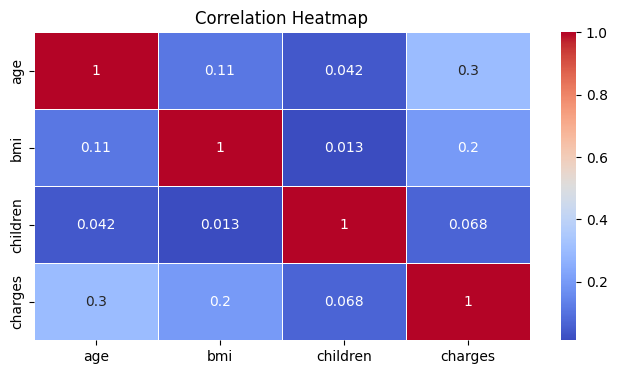

In [17]:
# select numeric columns only

numeric_data = data.select_dtypes(include='number')

# compute correlation matrix
corr_matrix = numeric_data.corr()

# plot the heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Data Preprocessing

## Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data['sex'] = le.fit_transform(data['sex'])
data['region'] = le.fit_transform(data['region'])


In [20]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

,count
int64,5
float64,2


In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#Model Building

In [22]:
from sklearn.model_selection import train_test_split
# Separate the features and the target variable
X = data.drop(columns = ['charges'])
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(pred)

[ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309 28048.59793155  9424.36324087
  5326.32232088 38460.06017922 40303.40597026 37147.01010262
 15287.91876684 35965.05485917  9179.1753067  31510.8319849
  3797.79068365 10070.82803304  2312.57551348  7074.41348194
 11352.37224357 12907.77079523 14448.84678727  6205.65997921
  9917.00839638  2239.50032819  9060.55469043 13120.56214535
  4617.70702822  3467.91218926  4402.74821855 12967.91608907
  1927.44498944  8757.9180081  33324.35180597 32638.47697026
  3852.41756615  4370.39670883 14080.76023234 11478.63402576
  8829.26135924 12046.15119133  5322.80515731  3100.71182484
 35546.60547574  9201.61196817 15894.23763341  2406.04003607
 12397.52052544  1433.90617387 13448.14094304 12519.54174599
  4295.28664609 32202.67982224 13263.171278   12842.10998145
 14111.93665793 10551.59361363 16298.16745307  7818.15570419
 11787.5726767   4113.268

#Evaluation Metrics

In [45]:
from sklearn.metrics import r2_score # Import mean_squared_error for evaluation
print(r2_score(y_test,pred))

0.7833463107364539


#Prediction

In [46]:
# Make predictions using the loaded model
model.predict([[19,0, 27.9,0,1,3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25139.73133878])

Polynominal Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(X_train) # Changed x_train to X_train
x_test_poly=poly.transform(X_test) # Changed x_test to X_test
lr1=LinearRegression()
lr1.fit(x_train_poly,y_train)

LinearRegression()

In [48]:
y_pred_poly=lr1.predict(x_test_poly)
r2_poly=r2_score(y_test,y_pred_poly)
print('R2:',r2_poly)

R2: 0.8677566718537743


In [49]:
model.predict([[19,0, 27.9,0,1,3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25139.73133878])

#Interpretations of the Model's Findings

Smokers are charged significantly more for insurance than non-smokers, indicating a high health risk.

Higher BMI is associated with higher charges, possibly due to obesity-related health risks.

As age increases, medical charges tend to increase, reflecting rising healthcare needs with age.

There is little difference in charges between males and females.

Some regions (e.g., southeast) may have higher average charges, but impact is small compared to other features.


The R² score shows that the model explains a good portion of the variation in charges.


# "The model shows that smoking, age, and BMI are the strongest predictors of insurance charges, with smoking having the largest impact"

